In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_df = pd.read_csv('Housing.csv')
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing_df.shape

(545, 13)

In [5]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
print("Missing Values:\n", housing_df.isnull().sum())

Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
duplicates = housing_df.duplicated().sum()
duplicates

np.int64(0)

In [9]:
outliers = {}
for col in housing_df.select_dtypes(include='number').columns:
    Q1 = housing_df[col].quantile(0.25)
    Q3 = housing_df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers[col] = housing_df[(housing_df[col] < Q1 - 2 * IQR) | (housing_df[col] > Q3 + 2 * IQR)]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in price: 1
Outliers in area: 2
Outliers in bedrooms: 3
Outliers in bathrooms: 4
Outliers in stories: 5
Outliers in parking: 6


In [10]:
for col in outliers.keys():
    print(col)
    print(outliers[col])
    print("\n")

price
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
5  10850000  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
5             

In [11]:
housing_df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [12]:
housing_num = housing_df.select_dtypes(include='number').columns
housing_cat = housing_df.select_dtypes(include='object').columns
num_housing_df = housing_df[housing_num]
cat_housing_df = housing_df[housing_cat]
cat_housing_df.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


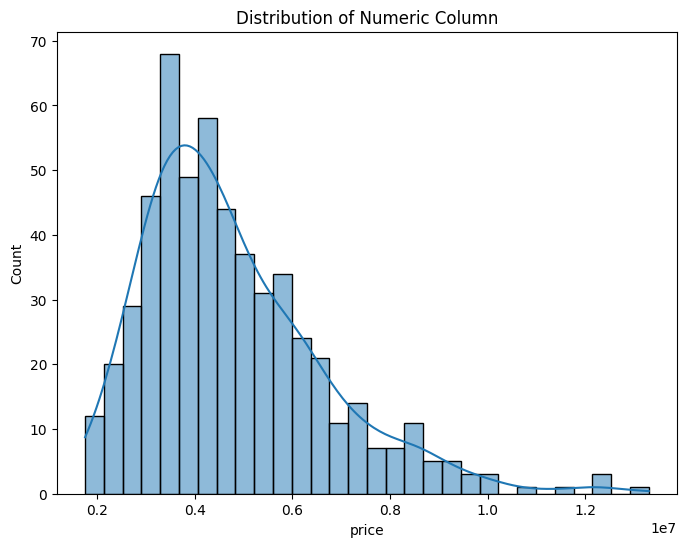

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['price'], kde=True, bins=30)
plt.title("Distribution of Numeric Column")
plt.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

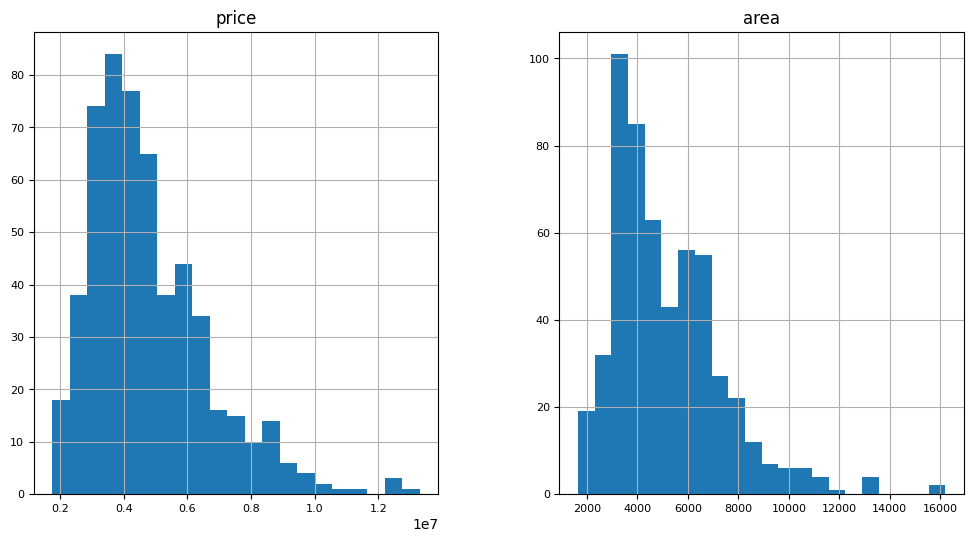

In [14]:
num_housing_df[['price', 'area']].hist(figsize=(12, 6), bins='auto', xlabelsize=8, ylabelsize=8)

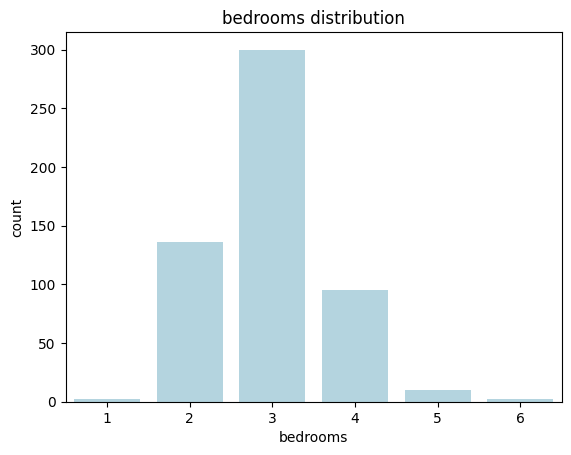

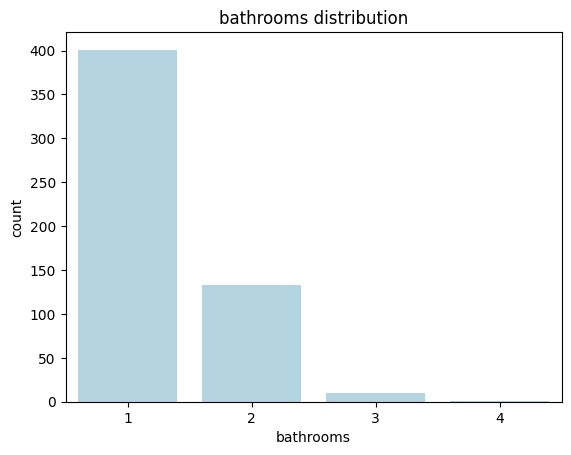

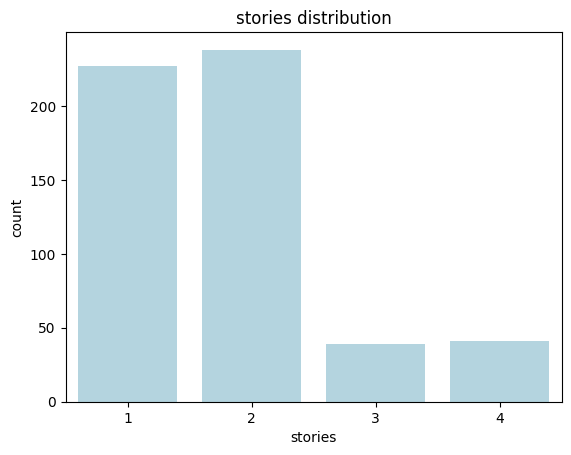

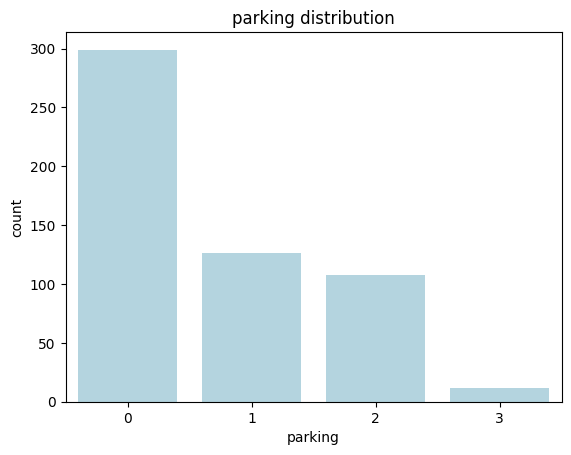

In [15]:
for col in num_housing_df.columns:
    if(col == 'price' or col == 'area'):
        continue
    sns.countplot(num_housing_df, x = col, color = "lightblue")
    plt.title(f'{col} distribution')
    plt.show()

<Axes: >

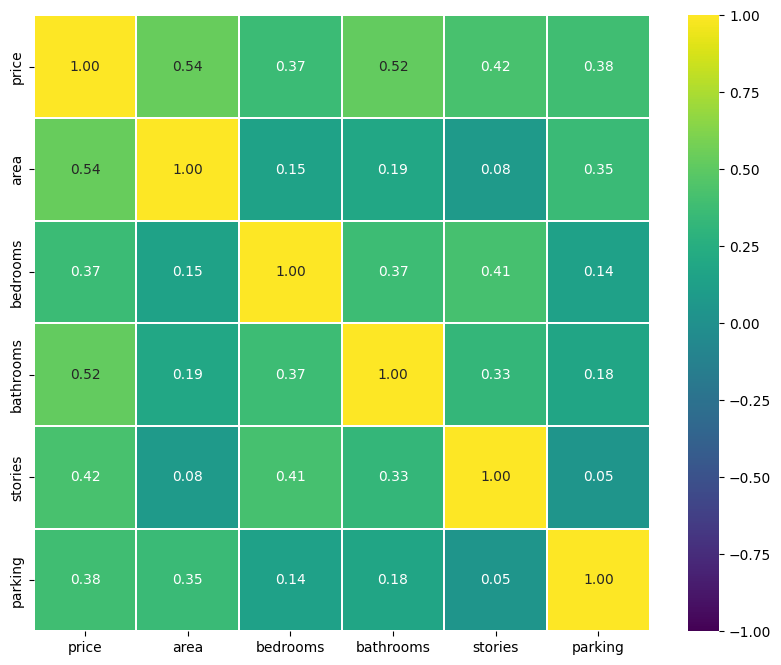

In [ ]:
corr = num_housing_df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, fmt=".2f", square=True)


<Axes: >

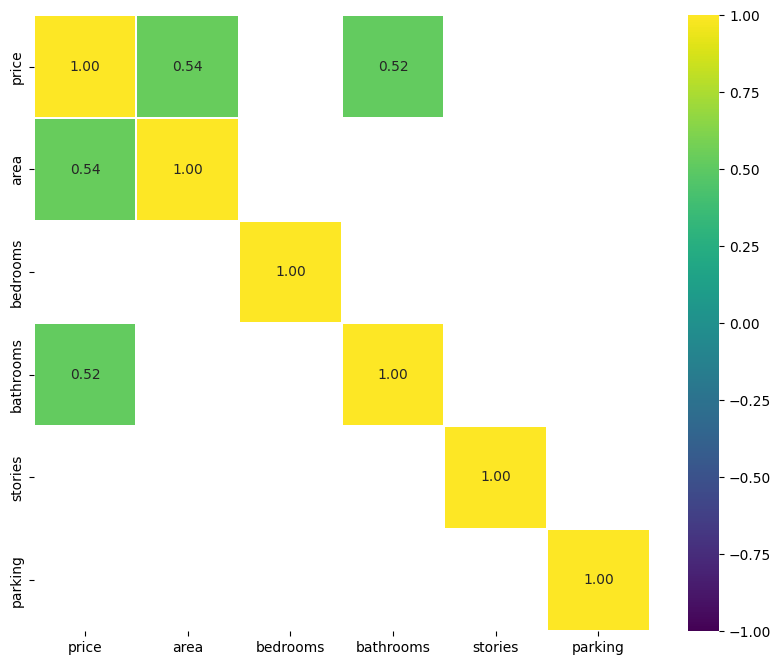

In [17]:
# Play with arguments fot better visualizations
corr = num_housing_df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, fmt=".2f", square=True)


In [18]:
import plotly.express as px

for col in housing_df.columns.drop(['price', 'area']):
    fig = px.box(
        housing_df,
        x=col,
        y='price',
        points='all',  # Show all individual data points
        hover_data=housing_df.columns,  # Show full row info on hover
        title=f"Interactive Boxplot: price vs {col}"
    )
    fig.show()


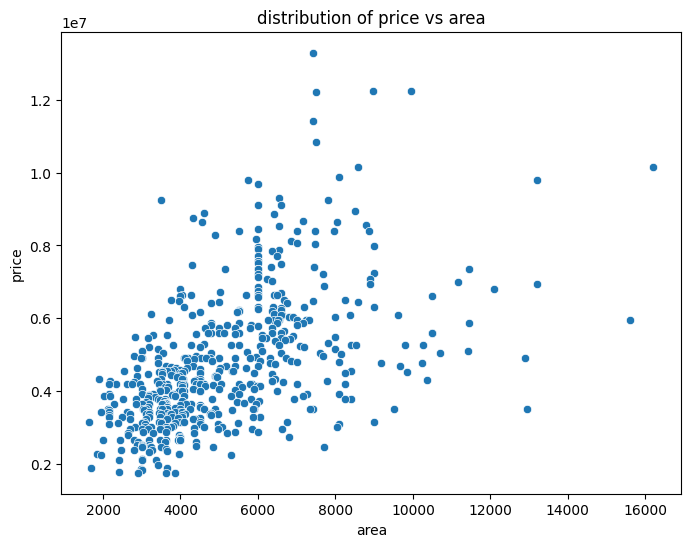

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=num_housing_df)
plt.title("distribution of price vs area")
plt.show()

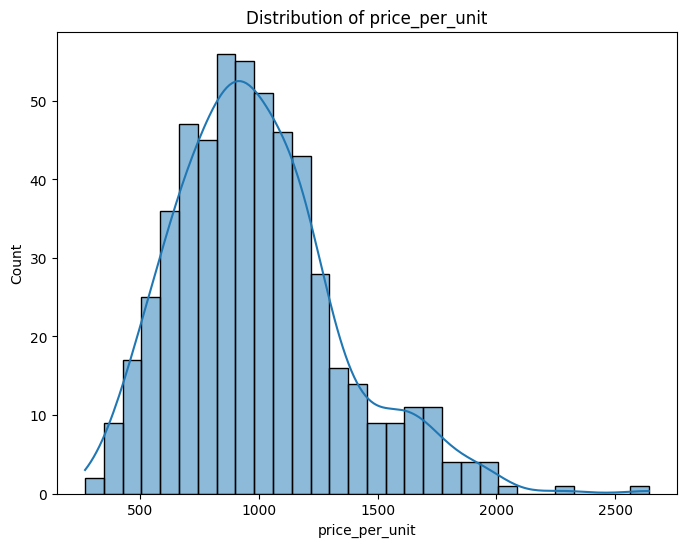

In [ ]:
housing_df['price_per_unit'] = num_housing_df['price']/num_housing_df['area']
plt.figure(figsize=(8, 6))
sns.histplot(housing_df['price_per_unit'], kde=True, bins=30)
plt.title("Distribution of price_per_unit")
plt.show()